# Групповая обработка и слияние данных в Pandas

Библиотека `pandas` - это основной инструмент для работы с табличными данными в Python.

С помощью библиотеки `pandas` можно:  
 - загружать данные из разных форматов и источников,
 - отфильтровывать и выбирать нужные данные,
 - выполнять вычисления на основе данных,
 - агрегировать данные,
 - переструктурировать данные,
 - объединять данные из разных источников,
 - выполнять очистку данных и замену пропущенных значений,
 - быстро визуализировать данные,
 - экспортировать данные в различные форматы.

В этом блокноте рассмотрены инструменты для групповой обработки данных, построения сводных таблиц, слияния данных из разных источников, а также работа с мультииндексами.

## Ресурсы

* Книги Уэса Маккинни Python и анализ данных и Дж. Вандер Пласа Python для сложных задач (см. ресурсы в LMS)
* Раздел про [групповую обработку в документации Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* Документация: https://pandas.pydata.org/
* 10 minutes intro: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
* Pandas Cheat-Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
* Pandas Basics Cheat-Sheet: http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3

## Подготовка

Подключим библиотеку и загрузим набор данных из текстового файла. [CSV = Comma Separated Values](https://ru.wikipedia.org/wiki/CSV) - распространенный формат обмена табличными данными, в котором каждой строке файла соответствует строка таблицы данных, а значения их разных столбцов разделяются запятыми или другими разделителями. Обычно также присутствует строка заголовка таблицы с названиями ее столбцов.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mpg = pd.read_csv('../datasets/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Мы загрузили данные о расходе топлива автомобилями разных марок и годов производства. Столбцы таблицы обозначают:

 - `manufacturer` - марка машины
 - `model` - модель
 - `displ` - объем двигателя в л
 - `year` - год выпуска
 - `cyl` - количество цилиндров
 - `trans` - тип трансмиссии (ручная или автоматическая коробка передач)
 - `drv` - тип привода (`f` - передний, `r` - задний, `4` - полный)
 - `cty` - пробег на 1 галлоне топлива (~4 л) в городе
 - `cty` - пробег на 1 галлоне топлива на трассе
 - `fl` - тип топлива
 - `class` - класс машины
 
Загруженный набор данных доступен в виде объекта `mpg`. Тип объекта - `DataFrame` (датафрейм, или просто таблица данных).

Структура таблицы Pandas показана на рисунке:

![](pics/pandas-data-structure.svg)

## Групповая обработка

### Принцип Разбиение - Применение - Объединение

Просты агрегирующие функции дают возможность познакомиться с набором данных, но часто нужно выполнить условное агрегирование по какому-нибудь категориальному столбцу данных или по индексу. Это действие в pandas реализовано в операции `GroupBy`. Эта операция разбивает набор данных на группы по уникальным значениям выбранных полей или индекса. Затем к каждой группе применяется некоторая функция агрегирования или преобразования. Также можно использовать циклы по группам. Затем результаты обработки групп объединяются снова в один набор данных. Удобство групповой обработки состоит в том, что все эти действия производятся автоматически.

![](pics/group_by.png)

На рисунке показано, как групповая обработка используется для определения сумм по категориям, заданным ключевым столбцом.

Используем групповую обработку для того, чтобы посчитать среднюю топливную эффективность различных марок машин.

In [3]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
mpg_groupby = mpg.loc[:, :'cty'].groupby('manufacturer') # Группируем таблицу по производителю

In [5]:
mpg_groupby # Получили объект GroupBy

Внутри объекта `GroupBy` содержатся сгруппированные строки таблицы в виде списка кортежей вида:  
`(ключ, фрагмент данных, соответствующий этому ключу)`

In [6]:
list(mpg_groupby)[:2] 

[('audi',
     manufacturer       model  displ  year  cyl       trans drv  cty
  0          audi          a4    1.8  1999    4    auto(l5)   f   18
  1          audi          a4    1.8  1999    4  manual(m5)   f   21
  2          audi          a4    2.0  2008    4  manual(m6)   f   20
  3          audi          a4    2.0  2008    4    auto(av)   f   21
  4          audi          a4    2.8  1999    6    auto(l5)   f   16
  5          audi          a4    2.8  1999    6  manual(m5)   f   18
  6          audi          a4    3.1  2008    6    auto(av)   f   18
  7          audi  a4 quattro    1.8  1999    4  manual(m5)   4   18
  8          audi  a4 quattro    1.8  1999    4    auto(l5)   4   16
  9          audi  a4 quattro    2.0  2008    4  manual(m6)   4   20
  10         audi  a4 quattro    2.0  2008    4    auto(s6)   4   19
  11         audi  a4 quattro    2.8  1999    6    auto(l5)   4   15
  12         audi  a4 quattro    2.8  1999    6  manual(m5)   4   17
  13         audi  a4 qu

Отдельную группу можно получить так:

In [7]:
mpg_groupby.get_group('audi')

,manufacturer,model,displ,year,cyl,trans,drv,cty
0,audi,a4,1.8,1999,4,auto(l5),f,18
1,audi,a4,1.8,1999,4,manual(m5),f,21
2,audi,a4,2.0,2008,4,manual(m6),f,20
3,audi,a4,2.0,2008,4,auto(av),f,21
4,audi,a4,2.8,1999,6,auto(l5),f,16
5,audi,a4,2.8,1999,6,manual(m5),f,18
6,audi,a4,3.1,2008,6,auto(av),f,18
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20


По полученному объекту `GroupBy` можно итерироваться с помощью циклов. Это может быть полезно, если нужно сохранить данные в отдельный файл или построить графики по каждой подгруппе отдельно.

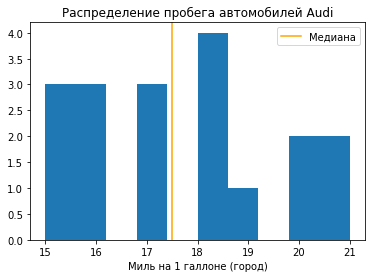

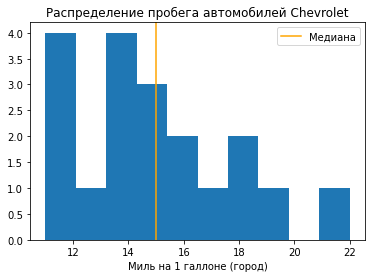

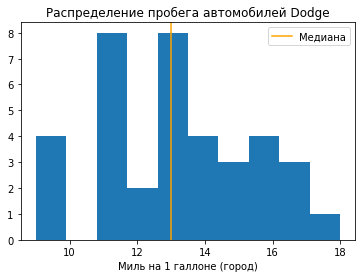

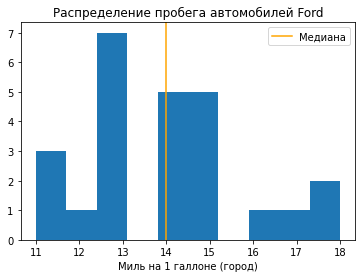

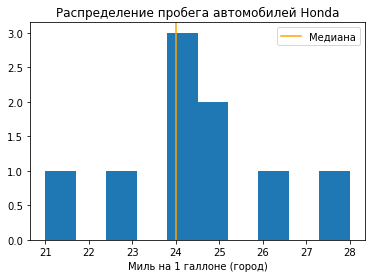

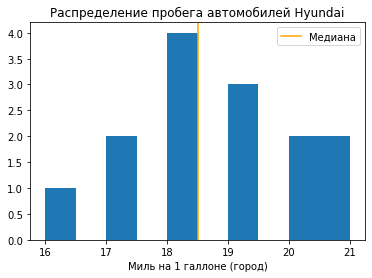

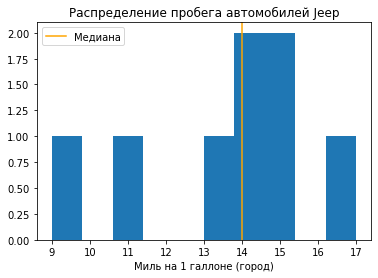

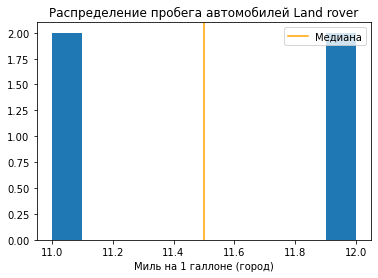

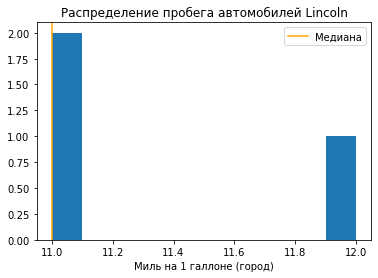

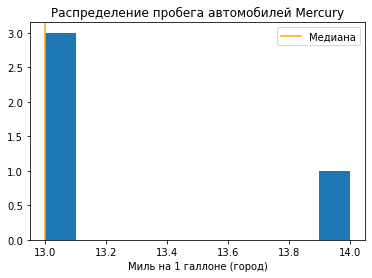

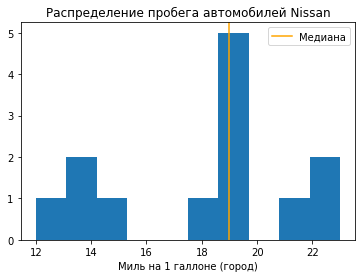

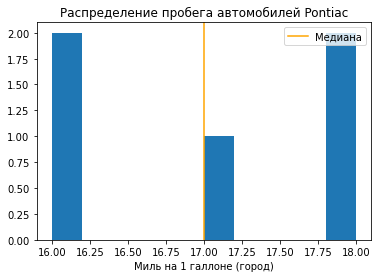

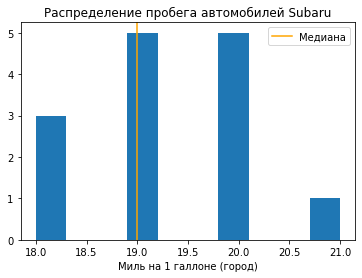

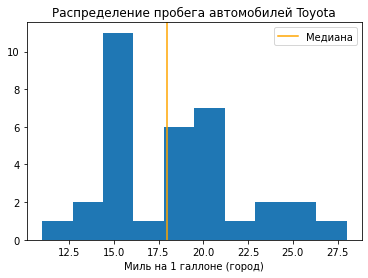

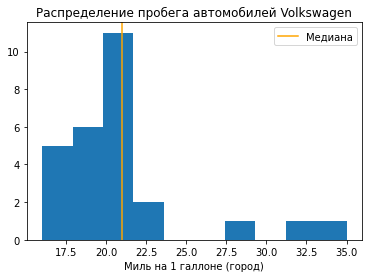

In [8]:
for name, data in mpg_groupby:
    plt.hist(data['cty'])
    plt.title('Распределение пробега автомобилей ' + name.capitalize())
    plt.xlabel('Миль на 1 галлоне (город)')
    plt.axvline(data['cty'].median(), label='Медиана', color='orange')
    plt.legend()
    plt.show()

Помимо использования циклов, можно использовать метод `apply()`, чтобы применить к результатам группировки любую функцию.

Например, так можно посчитать, сколько строк попало в каждую группу:

In [9]:
mpg_groupby.apply(len)

manufacturer
audi          18
chevrolet     19
dodge         37
ford          25
honda          9
hyundai       14
jeep           8
land rover     4
lincoln        3
mercury        4
nissan        13
pontiac        5
subaru        14
toyota        34
volkswagen    27
dtype: int64

Поскольку определение размера группы - востребованная операций, у объекта `GroupBy` есть метод `size()`, который выдает сколько строк оказалось в каждой группе.

In [10]:
mpg_groupby.size()

manufacturer
audi          18
chevrolet     19
dodge         37
ford          25
honda          9
hyundai       14
jeep           8
land rover     4
lincoln        3
mercury        4
nissan        13
pontiac        5
subaru        14
toyota        34
volkswagen    27
dtype: int64

Однако наиболее частое использование сгруппированных данных - это подсчет итогов по ним.

In [11]:
avg_by_manufacturer = mpg_groupby.mean() # Посчитали среднее по всем числовым столбцам
avg_by_manufacturer

,displ,year,cyl,cty
manufacturer,,,,
audi,2.544444,2003.500000,5.222222,17.611111
chevrolet,5.063158,2004.684211,7.263158,15.000000
dodge,4.378378,2004.108108,7.081081,13.135135
ford,4.536000,2002.600000,7.200000,14.000000
honda,1.711111,2003.000000,4.000000,24.444444
hyundai,2.428571,2004.142857,4.857143,18.642857
jeep,4.575000,2005.750000,7.250000,13.500000
land rover,4.300000,2003.500000,8.000000,11.500000
lincoln,5.400000,2002.000000,8.000000,11.333333


In [12]:
avg_cty_by_manufacturer = mpg_groupby['cty'].mean() # Посчитали среднее по столбцу cty
avg_cty_by_manufacturer

manufacturer
audi          17.611111
chevrolet     15.000000
dodge         13.135135
ford          14.000000
honda         24.444444
hyundai       18.642857
jeep          13.500000
land rover    11.500000
lincoln       11.333333
mercury       13.250000
nissan        18.076923
pontiac       17.000000
subaru        19.285714
toyota        18.529412
volkswagen    20.925926
Name: cty, dtype: float64

Обратите внимание, что мы получили ряд. Если нужна таблица, то можно сделать так:

In [13]:
mpg_groupby[['cty']].mean() # Или так, если нужна таблица

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


### Что делать с ключом: индекс vs столбец

По умолчанию pandas при слиянии результатов по подгруппам делает ключ подгруппы индексом таблицы/ряда с итогами. Если удобнее оставить ключ группы столбцом таблицы, то можно при группировке задать аргумент `as_index=False`.

Кстати, групповую обработку обычно делают в один шаг, без создания промежуточной переменной.

In [14]:
mpg.groupby('manufacturer', as_index=False).mean()

,manufacturer,displ,year,cyl,cty,hwy
0,audi,2.544444,2003.500000,5.222222,17.611111,26.444444
1,chevrolet,5.063158,2004.684211,7.263158,15.000000,21.894737
2,dodge,4.378378,2004.108108,7.081081,13.135135,17.945946
3,ford,4.536000,2002.600000,7.200000,14.000000,19.360000
4,honda,1.711111,2003.000000,4.000000,24.444444,32.555556
5,hyundai,2.428571,2004.142857,4.857143,18.642857,26.857143
6,jeep,4.575000,2005.750000,7.250000,13.500000,17.625000
7,land rover,4.300000,2003.500000,8.000000,11.500000,16.500000
8,lincoln,5.400000,2002.000000,8.000000,11.333333,17.000000
9,mercury,4.400000,2003.500000,7.000000,13.250000,18.000000


Еще один способ оставить ключ группировки из индекса в столбцы - сбросить индекс с помощью метода `reset_index()`:

In [15]:
mpg.groupby('manufacturer').mean().reset_index()

,manufacturer,displ,year,cyl,cty,hwy
0,audi,2.544444,2003.500000,5.222222,17.611111,26.444444
1,chevrolet,5.063158,2004.684211,7.263158,15.000000,21.894737
2,dodge,4.378378,2004.108108,7.081081,13.135135,17.945946
3,ford,4.536000,2002.600000,7.200000,14.000000,19.360000
4,honda,1.711111,2003.000000,4.000000,24.444444,32.555556
5,hyundai,2.428571,2004.142857,4.857143,18.642857,26.857143
6,jeep,4.575000,2005.750000,7.250000,13.500000,17.625000
7,land rover,4.300000,2003.500000,8.000000,11.500000,16.500000
8,lincoln,5.400000,2002.000000,8.000000,11.333333,17.000000
9,mercury,4.400000,2003.500000,7.000000,13.250000,18.000000


Метод `reset_index()` переносит значения индекса в столбец таблицы и зменяет индекс числовым.

### Использование в качестве ключа группировки ряда и вычисляемого столбца

Интересно, что группировать можно не только по значениям или индексам таблицы. В качестве ключа в `groupby()` можно передать любой ряд такой же длины, как и таблица данных. Этим можно пользоваться при группировке больших таблиц: можно сначала извлечь только нужные столбцы, а затем сгруппировать используя какой-либо категориальный столбец.

In [16]:
mpg[['cty']].groupby(mpg['manufacturer']).mean() # В таблице остался один столбец `cty`, а группируется она по другому ряду

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


Это удобно использовать также в тех случаях, когда ключ группировки должен быть вначале вычислен. Попробуем посчитать среднюю эффективность машин с разным типом коробки передач:

In [17]:
mpg['trans'].unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [18]:
mpg[['cty']].groupby(mpg['trans'].str[-3:-1]).mean()

,cty
trans,
av,20.000000
l3,21.000000
l4,15.939759
l5,14.717949
l6,13.666667
m5,19.258621
m6,16.894737
s4,18.666667
s5,17.333333


### Группировка по нескольким ключам

Можно группировать по нескольким ключам одновременно.

In [19]:
mpg.groupby(['year', 'class'])[['cty']].mean()

cty
year class                
1999 2seater     15.500000
     compact     19.760000
     midsize     18.150000
     minivan     16.166667
     pickup      13.000000
     subcompact  21.578947
     suv         13.379310
2008 2seater     15.333333
     compact     20.545455
     midsize     19.333333
     minivan     15.400000
     pickup      13.000000
     subcompact  18.937500
     suv         13.606061

Т.к. мы группировали по двум столбцам, получился иерархический индекс (`MultiIndex`) - подробнее об этом позже. Вернуть ключ группировки в столбцы можно теми же способами, что и раньше. Например, так:

In [20]:
mpg.groupby(['year', 'class'])[['cty']].mean().reset_index()

,year,class,cty
0,1999,2seater,15.500000
1,1999,compact,19.760000
2,1999,midsize,18.150000
3,1999,minivan,16.166667
4,1999,pickup,13.000000
5,1999,subcompact,21.578947
6,1999,suv,13.379310
7,2008,2seater,15.333333
8,2008,compact,20.545455
9,2008,midsize,19.333333


В Pandas можно группировать не только строки, но и столбцы. Например, так можно посчитать, сколько в таблице есть столбцов разных типов:

In [21]:
mpg_grouped_columns = mpg.groupby(mpg.dtypes, axis='columns')
mpg_grouped_columns.apply(lambda x: x.shape[1])

int64      4
float64    1
object     6
dtype: int64

### Фильтрация на основе групп

При необходимости можно отфильтровать строки на основе групп, к которым они принадлежат. Для этого используется метод `filter()`, который применяет заданную функцию к каждой группе. Затем исходная таблица фильтруется и в ней остаются только те строки, которые принадлежат к группам, для которых функция выдала `True`.

В качестве примера, посчитаем средние характеристики машин только по тем производителям, у которых более 15 машин в наборе данных:

In [22]:
mpg.groupby('manufacturer').filter(lambda x: len(x) > 15).groupby('manufacturer').mean()
# filter выдает разгруппированные строки, поэтому пришлось их еще раз сгруппировать

,displ,year,cyl,cty,hwy
manufacturer,,,,,
audi,2.544444,2003.500000,5.222222,17.611111,26.444444
chevrolet,5.063158,2004.684211,7.263158,15.000000,21.894737
dodge,4.378378,2004.108108,7.081081,13.135135,17.945946
ford,4.536000,2002.600000,7.200000,14.000000,19.360000
toyota,2.952941,2002.705882,5.117647,18.529412,24.911765
volkswagen,2.255556,2002.666667,4.592593,20.925926,29.222222


### Агрегирование

К группам можно применять любые агрегирующие функции, т.е. функции, которые принимают массив значений и возвращают его сводную характеристику (обычно одну).

В таблице приведены некоторые из этих функций, для которых в Pandas есть оптимизированная реализация. Однако агрегирующая функция может быть любой - например, одной из функций для подсчета описательных статистик, или функцией из `numpy`, или пользовательской функцией.

![](pics/pandas-aggregation.png)

Посчитаем медианный пробег на галлоне в городе для разных классов машин:

In [23]:
mpg.groupby('class')[['cty']].median()

,cty
class,
2seater,15
compact,20
midsize,18
minivan,16
pickup,13
subcompact,19
suv,13


Еще один частый пример - поиск лучших/худших представителей в каждой группе. Найдем наиболее экономичные машины в каждом классе:

In [24]:
mpg.groupby('class').apply(lambda x: x.nlargest(1, 'cty'))

,,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
class,,,,,,,,,,,,
2seater,23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
compact,212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
midsize,143,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize
minivan,37,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan
pickup,202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
subcompact,221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
suv,161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv


### Несколько агрегирующих функций

При необходимости можно получить сразу несколько агрегированных значений. Например, описательную статистику можно получить с помощью `describe()`:

In [25]:
mpg.groupby('class')['cty'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
2seater,5.0,15.400000,0.547723,15.0,15.0,15.0,16.00,16.0
compact,47.0,20.127660,3.385500,15.0,18.0,20.0,21.00,33.0
midsize,41.0,18.756098,1.946542,15.0,18.0,18.0,21.00,23.0
minivan,11.0,15.818182,1.834022,11.0,15.5,16.0,17.00,18.0
pickup,33.0,13.000000,2.046338,9.0,11.0,13.0,14.00,17.0
subcompact,35.0,20.371429,4.602338,14.0,17.0,19.0,23.50,35.0
suv,62.0,13.500000,2.420879,9.0,12.0,13.0,14.75,20.0


Мы можем рассчитать для групп произвольный набор характеристик с помощью метода `agg()`. Метод принимает на вход список функций, которые надо применить к группам. Функцию можно указать по имени, а встроенные в Pandas функции можно указывать по их кратким именам в виде строк.

In [26]:
def my_range(x): # Размах
    return x.max() - x.min()    
    
mpg.groupby('class')['cty'].agg(['mean', 'median', np.median, my_range])

,mean,median,median,my_range
class,,,,
2seater,15.400000,15,15,1
compact,20.127660,20,20,18
midsize,18.756098,18,18,8
minivan,15.818182,16,16,7
pickup,13.000000,13,13,8
subcompact,20.371429,19,19,21
suv,13.500000,13,13,11


Столбцы получают такие же имена, как и у функций для их расчета. Можно также задать сразу понятные имена столбцов, передав на вход `agg()` список из двухэлементных кортежей - с подписями столбцов и с функциями, которые надо применить для их расчета:

In [27]:
mpg.groupby('class')['cty'].agg([('Среднее', 'mean'), 
                                 ('Медиана', 'median'), 
                                 ('Размах', my_range)])

,Среднее,Медиана,Размах
class,,,
2seater,15.400000,15,1
compact,20.127660,20,18
midsize,18.756098,18,8
minivan,15.818182,16,7
pickup,13.000000,13,8
subcompact,20.371429,19,21
suv,13.500000,13,11


В предыдущих примерах мы агрегировали ряд. При агрегировании таблицы функции применяются сразу ко всем столбцам:

In [28]:
mpg.groupby('class')[['cty','hwy']].agg(['mean', 'median', np.median, my_range])

cty                               hwy                       
                 mean median median my_range       mean median median my_range
class                                                                         
2seater     15.400000     15     15        1  24.800000   25.0   25.0        3
compact     20.127660     20     20       18  28.297872   27.0   27.0       21
midsize     18.756098     18     18        8  27.292683   27.0   27.0        9
minivan     15.818182     16     16        7  22.363636   23.0   23.0        7
pickup      13.000000     13     13        8  16.878788   17.0   17.0       10
subcompact  20.371429     19     19       21  28.142857   26.0   26.0       24
suv         13.500000     13     13       11  18.129032   17.5   17.5       15

Если необходимо к разным столбцам применить разные функции, то на вход `agg()` надо подать словарь, в котором для каждого поля (ключ словаря) задается функция или список функций, которые надо применить:

In [29]:
mpg.groupby('class')[['cty','hwy']].agg({ 'cty' : ['mean', 'std'], 
                                         'hwy': ['median', ('range', my_range)]})

cty              hwy      
                 mean       std median range
class                                       
2seater     15.400000  0.547723   25.0     3
compact     20.127660  3.385500   27.0    21
midsize     18.756098  1.946542   27.0     9
minivan     15.818182  1.834022   23.0     7
pickup      13.000000  2.046338   17.0    10
subcompact  20.371429  4.602338   26.0    24
suv         13.500000  2.420879   17.5    15

### Преобразование

Агрегирующие функции сокращают данные по группе, заменяя все сгруппированные строки одним значением. Иногда необходимо вместо этого выполнить некоторое вычисление отдельно по каждой группе. Мы уже видели вариант с `apply()`, но есть еще удобный метод `transform()`. Этот метод возвращает столько же строк, сколько было в исходной таблице, при этом вычисления выполняются для каждой подгруппы отдельно. Можно применять этот метод как к рядам, так и к таблицам данных. 

Например, таким образом можно центировать данные - посчитать, насколько значение отличается от среднего по группе. 
В следующем примере мы вычислим, насколько эффективность каждой модели машины отличается от средней эффективности машин этого производителя.

In [30]:
mpg2 = mpg.loc[:, ['manufacturer', 'model', 'cty']] # Сделали маленькую табличку с нужными полями

mpg2['group_mean'] = mpg.groupby('manufacturer')['cty'].transform('mean')
mpg2['delta'] = mpg.groupby('manufacturer')['cty'].transform(lambda x: x - x.mean())
mpg2

,manufacturer,model,cty,group_mean,delta
0,audi,a4,18,17.611111,0.388889
1,audi,a4,21,17.611111,3.388889
2,audi,a4,20,17.611111,2.388889
3,audi,a4,21,17.611111,3.388889
4,audi,a4,16,17.611111,-1.611111
...,...,...,...,...,...
229,volkswagen,passat,19,20.925926,-1.925926
230,volkswagen,passat,21,20.925926,0.074074
231,volkswagen,passat,16,20.925926,-4.925926
232,volkswagen,passat,18,20.925926,-2.925926


Здесь пришлось сохранить результат преобразования как столбец таблицы. Сама по себе функция преобразования выдает ряд или таблицу только с преобразованными столбцами

In [31]:
mpg.groupby('manufacturer')['cty'].transform('mean')

0      17.611111
1      17.611111
2      17.611111
3      17.611111
4      17.611111
         ...    
229    20.925926
230    20.925926
231    20.925926
232    20.925926
233    20.925926
Name: cty, Length: 234, dtype: float64

## Сводные таблицы

Сводная таблица (pivot table) - позволяет агрегировать данные по двум и более ключам, где одни ключи групп расположены в строках, а другие - в столбцах. В ячейках таблицы содержатся агрегированные заданной функцией данные о соответствующих этим ключам группах. Эта функция Pandas аналогична сводным таблицам в Excel.


Чтобы построить сводную таблицу, можно воспользоваться функцией `pivot_table()`, или методом таблицы `pivot_table()`.
Построим сводную таблицу, чтобы узнать, как менялась топливная эффективность разных классов машин со временем.

In [40]:
mpg.pivot_table(['cty', 'hwy'], index = 'class', columns = 'year', aggfunc=('mean', 'max'))

cty                               hwy                            
             max             mean              max             mean           
year        1999  2008       1999       2008  1999  2008       1999       2008
class                                                                         
2seater     16.0  16.0  15.500000  15.333333  26.0  26.0  24.500000  25.000000
compact     33.0  28.0  19.760000  20.545455  44.0  37.0  27.920000  28.727273
midsize     21.0  23.0  18.150000  19.333333  29.0  32.0  26.500000  28.047619
minivan     18.0  17.0  16.166667  15.400000  24.0  24.0  22.500000  22.200000
pickup      16.0  17.0  13.000000  13.000000  20.0  22.0  16.812500  16.941176
subcompact  35.0  26.0  21.578947  18.937500  44.0  36.0  29.000000  27.125000
suv         18.0  20.0  13.379310  13.606061  25.0  27.0  17.551724  18.636364

Если не указывать список столбцов и агрегирующих функций, то сводная таблица будет рассчитана для всех переменных с использованием для агрегирования среднего.

In [44]:
mpg.pivot_table(index = 'class', columns = 'year' )

cty                  cyl               displ            \
year             1999       2008      1999      2008      1999      2008   
class                                                                      
2seater     15.500000  15.333333  8.000000  8.000000  5.700000  6.466667   
compact     19.760000  20.545455  4.720000  4.454545  2.292000  2.363636   
midsize     18.150000  19.333333  5.300000  5.333333  2.720000  3.114286   
minivan     16.166667  15.400000  5.666667  6.000000  3.266667  3.540000   
pickup      13.000000  13.000000  6.750000  7.294118  4.356250  4.476471   
subcompact  21.578947  18.937500  4.631579  5.500000  2.421053  2.943750   
suv         13.379310  13.606061  6.758621  7.151515  4.327586  4.569697   

                  hwy             
year             1999       2008  
class                             
2seater     24.500000  25.000000  
compact     27.920000  28.727273  
midsize     26.500000  28.047619  
minivan     22.500000  22.200000  
pickup      16.812500  16.941176  
subcompact  29.000000  27.125000  
suv         17.551724  18.636364

Индекс строк или столбцов может включать несколько ключей группировки. Рассчитаем, как менялась топливная эффективность по классам и типам коробки передач.

In [53]:
mpg.pivot_table('cty', index = ['class', mpg['trans'].str[:-4]], columns = 'year' )

year                    1999       2008
class      trans                       
2seater    auto    15.000000  15.000000
           manual  16.000000  15.500000
compact    auto    18.750000  20.500000
           manual  20.692308  20.600000
midsize    auto    17.692308  18.812500
           manual  19.000000  21.000000
minivan    auto    16.166667  15.400000
pickup     auto    12.777778  12.818182
           manual  13.285714  13.333333
subcompact auto    20.888889  19.571429
           manual  22.200000  18.444444
suv        auto    12.916667  13.225806
           manual  15.600000  19.500000

Как и в Excel, сводные таблицы Pandas могут автоматически вычислять итоги по строкам и столбцам.

In [55]:
mpg.pivot_table('cty', index = 'class', columns = 'year', margins=True )

year,1999,2008,All
class,,,
2seater,15.500000,15.333333,15.400000
compact,19.760000,20.545455,20.127660
midsize,18.150000,19.333333,18.756098
minivan,16.166667,15.400000,15.818182
pickup,13.000000,13.000000,13.000000
subcompact,21.578947,18.937500,20.371429
suv,13.379310,13.606061,13.500000
All,17.017094,16.700855,16.858974


В таблице приведены аргументы `pivot_table()`
![](pics/pandas-pivot.png)

Частным случаем сводной таблицы является **таблица сопряженности** (перекрестная таблица, cross-tabulation), которая отражает количество элементов в подгруппах - групповые частоты. Этот вид таблиц используется для анализа связей между категориальными переменными. Получить таблицу сопряженности можно с помощью функции `crosstab()`:

In [60]:
pd.crosstab(index=mpg['class'], columns=mpg['year'], margins=True)

year,1999,2008,All
class,,,
2seater,2,3,5
compact,25,22,47
midsize,20,21,41
minivan,6,5,11
pickup,16,17,33
subcompact,19,16,35
suv,29,33,62
All,117,117,234


Т.к. `crosstab()` - это обычная функция, а не метод, пришлось передать ей извлеченные из таблицы столбцы `class` и `year`.

В таблице содержатся групповые частоты (количества) сочетаний типов машин и лет выпуска. Например, мы можем заметить, что в 1999 и 2008 годах общее количество машин, представленных в данных одинаково - 117 (строка `All` внизу таблицы), частота машин класса `compact` снизилась (25->22), а частота машин класса `SUV` ("паркетник") увеличилась. Исходя из этого, мы можем предположить, что популярность этих двух категорий автомобилей за прошедшие 10 лет снизилась и увеличилась соответственно.